In [1]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np
from mlp import MLP, Layer, InputLayer, OutputLayer, MultinoulliML
from utils import Adam

In [2]:
def epoch_it(X, epochs, batchsize):
    n, _ = X.shape
    N = int(n/batchsize)
    for _ in range(epochs):
        for i in range(N):
            yield X[i*batchsize : (i+1)*batchsize]

def file_it(path, skiplines=0):
    with open(path) as f:
        for _ in range(skiplines):
            f.readline()
        yield from f

In [3]:
class Conf:
    enabled = False
network = MLP(
    [
        InputLayer(28*28),
        Layer(16),
        Layer(16),
        OutputLayer(10)
    ],
    model=MultinoulliML(),
    optimizer=Adam(eps=0.09, clip_threshold=None),
    dropout=Conf
)

In [4]:
batchsize = 50
epochs = 20

data = np.loadtxt("../data/train.csv", skiprows=1, delimiter=",", dtype=int)
valset = data[:100]
valset = (valset[:, 1:] / 255, valset[:, 0])
trainset = data[100:]
it = epoch_it(trainset, epochs, batchsize=batchsize)

network.init_training(batchsize=batchsize, validation_set=valset)

In [5]:
for batch in it:
    X, Y = (batch[:,1:]/255, batch[:,0])
    cost, accuracy = network.train_minibatch((X, Y))
    print(accuracy, cost)

0.11 3.53498090173502
0.09 2.5275246954455115
0.09 2.5102372560723
0.09 2.5085383839730384
0.09 2.5071521853807086
0.09 2.50623150528924
0.09 2.505714762589611
0.1 2.50506346724081
0.1 2.504302332454849
0.1 2.50349511023701
0.1 2.5026134279075585
0.1 2.501794376942643
0.1 2.5010899265553563
0.1 2.4999783733435392
0.1 2.4990681846838165
0.1 2.4979277307990966
0.1 2.4967571373095225
0.1 2.4957448580724706
0.1 2.494923350821931
0.1 2.4937800968907298
0.1 2.492322575754949
0.1 2.490991556604739
0.1 2.4896457161828485
0.1 2.4885578858919613
0.1 2.4867853510067275
0.1 2.4857584699271187
0.1 2.4848625843890075
0.1 2.484171750977469
0.1 2.4825561756071397
0.1 2.4811976979443564
0.1 2.4797797097205847
0.1 2.4786650752901256
0.1 2.476951864960445
0.1 2.47570665090986
0.1 2.4738435818940854
0.1 2.4714171524013935
0.1 2.469305344180743
0.1 2.468201933647004
0.1 2.4666311964765764
0.1 2.464633563235817
0.1 2.463710748103084
0.1 2.4618968569303603
0.1 2.46044294712566
0.1 2.4585674205600565
0.1 2.45

In [6]:
network.cleanup_training()

In [7]:
it = map(
    lambda line: np.fromstring(line, sep=",", dtype=np.uint8),
    file_it("../data/test.csv", skiplines=1),
)

2


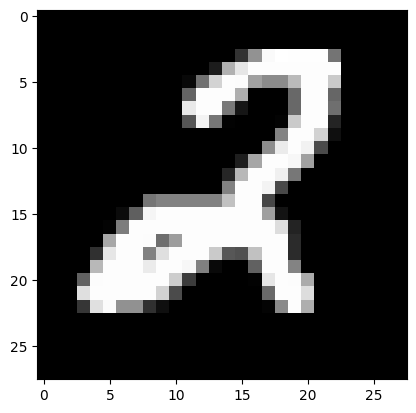

In [34]:
data = next(it)
n = network.feedforward(data/255)
print(n)
plt.imshow(data.reshape((28,28)), cmap="gray", vmin = 0, vmax = 255)

In [ ]:
network.output_layer.A

In [ ]:
class ParentA:
    def func(self, a):
        print("parent a", a)

class ParentB:
    def func(self, a):
        print("parent b", a)

class Derived(ParentA, ParentB):
    def func(self, a):
        super().func(a=a)
        print("derived", a)

In [ ]:
Derived().func("hello")

In [ ]:
import numpy as np
x = None
np.multiply(3, np.eye(3,3), out = x)

In [ ]:
x = 0 + np.inf

In [ ]:
x = 9
np.sqrt(x, out=x)

In [ ]:
(_, _, _, b) = (1,2,3,4)

In [ ]:
np.argmax(np.eye(3,3), axis=-1)

In [ ]:
x = np.array([1,2,3])
y = np.array([3,2,1])

np.average(x==y)

In [ ]:
import numpy as np 
x=np.eye(3,3)

In [ ]:
pos = (0,0)
x[*pos]

In [ ]:
int(2.6)

In [ ]:
x = True
if x:
    print("foo")
elif x:
    print("bar")